In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
dataset = pd.read_csv("Customer Churn.csv")
dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Convert Object into Float by Replacing Blank values and white spaces

In [84]:
dataset['TotalCharges'] =dataset['TotalCharges'].replace(' ','0')
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float')

In [86]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [87]:
dataset.isnull().sum().sum()

np.int64(0)

In [88]:
dataset['customerID'].duplicated().sum()

np.int64(0)

# Converting 0 and 1 into Yes or no

In [89]:
def conv(val):
    if val == 0:
        return 'No'
    else:
        return 'Yes'

dataset['SeniorCitizen'] = dataset['SeniorCitizen'].apply(conv)

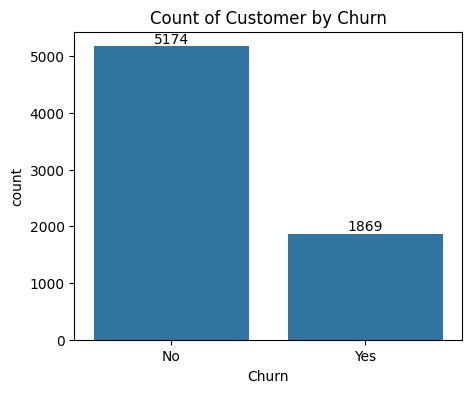

In [91]:
plt.figure(figsize=(5,4))
ax=sns.countplot(data=dataset, x="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

In [92]:
x=dataset['Churn'].value_counts().index
y=dataset['Churn'].value_counts().values

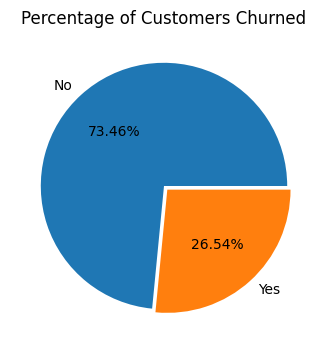

In [93]:
plt.figure(figsize=(5,4))
ex=[0,0.04]
plt.pie(y,labels=x,autopct="%.2f%%",explode=ex)
plt.title("Percentage of Customers Churned")
plt.show()

# From the given pie chart we can conclude that 26.54% customers has churned out

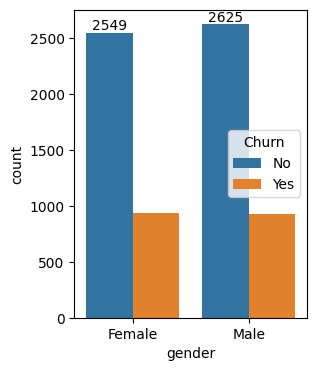

In [94]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data=dataset,x='gender',hue='Churn')
ax.bar_label(ax.containers[0])
plt.show()

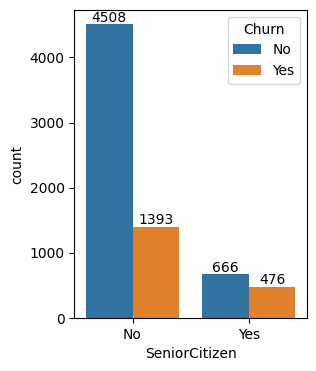

In [95]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data=dataset,x='SeniorCitizen',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

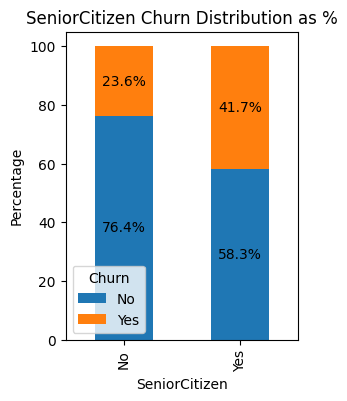

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `dataset` is your DataFrame
# Create a crosstab to calculate counts and normalize it to get percentages
cross_tab = pd.crosstab(dataset['SeniorCitizen'], dataset['Churn'], normalize='index') * 100

# Plot the stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(3, 4), color=['#1f77b4', '#ff7f0e'])

# Add labels with percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.ylabel('Percentage')
plt.title('SeniorCitizen Churn Distribution as %')
plt.show()


# comparatively a greater amount of Senior citizen categrory have churned out

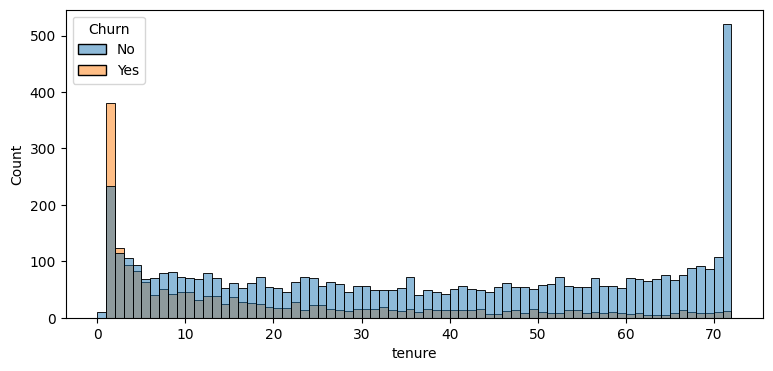

In [99]:
plt.figure(figsize=(9,4))
sns.histplot(data=dataset,x='tenure',bins=72,hue='Churn')
plt.show()

# Data show the record of those people who used our service and stayed with us for a long time and People who leave us after 1 or2 months 

In [100]:
dataset['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

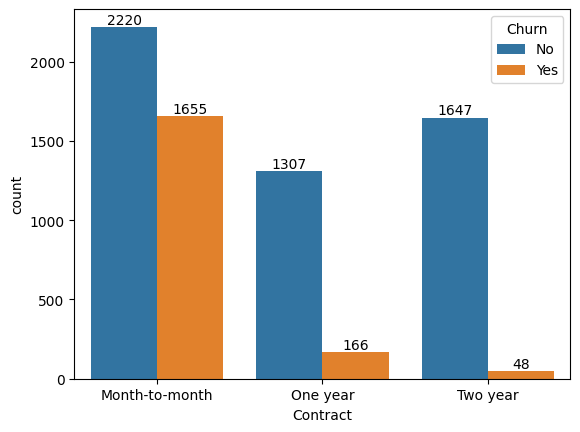

In [101]:
ax=sns.countplot(data=dataset,x='Contract',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# people who have month to month contract are likely to churn as compare to those who have 1 or 2 year contract

In [102]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

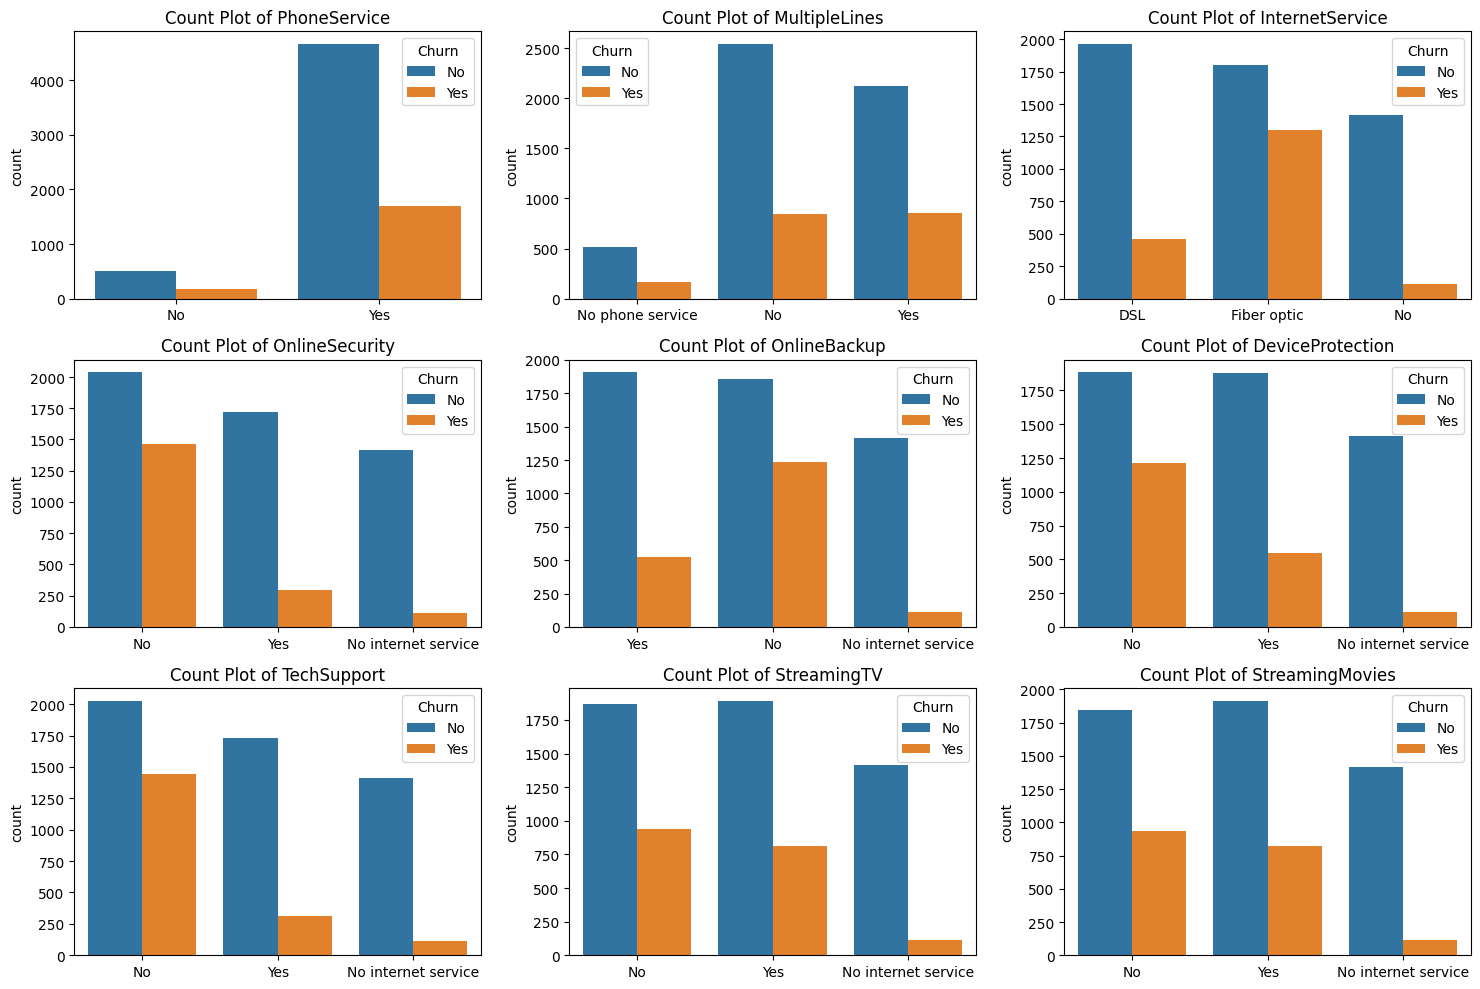

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame with the specified columns
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define the number of rows and columns for the subplot grid
n_cols = 3
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Plot count plots for each column
for i, column in enumerate(columns):
    sns.countplot(data=dataset, x=column, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel('')

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()


 The image shows a series of count plots for various customer services related to telecommunications (e.g., PhoneService, InternetService, TechSupport). Each plot displays the distribution of customers who either churned ("Yes") or did not churn ("No") for different service options like "Yes," "No," and "No internet service." It reveals patterns in customer retention and churn based on their service usage, such as higher churn rates for customers lacking services like OnlineSecurity, TechSupport, and Fiber optic internet.

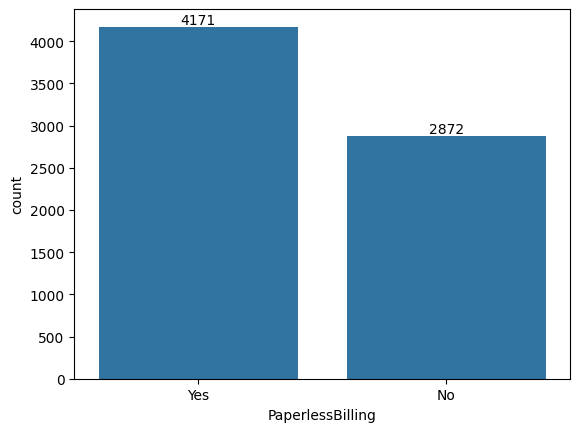

In [106]:
ax=sns.countplot(data=dataset,x='PaperlessBilling')
ax.bar_label(ax.containers[0])
plt.show()

In [107]:
x=dataset['PaperlessBilling'].value_counts().index
y=dataset['PaperlessBilling'].value_counts().values

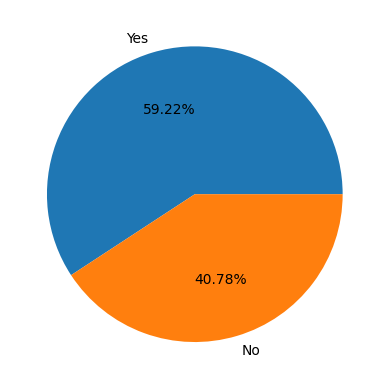

In [108]:
plt.pie(y,labels=x,autopct="%.2f%%")
plt.show()

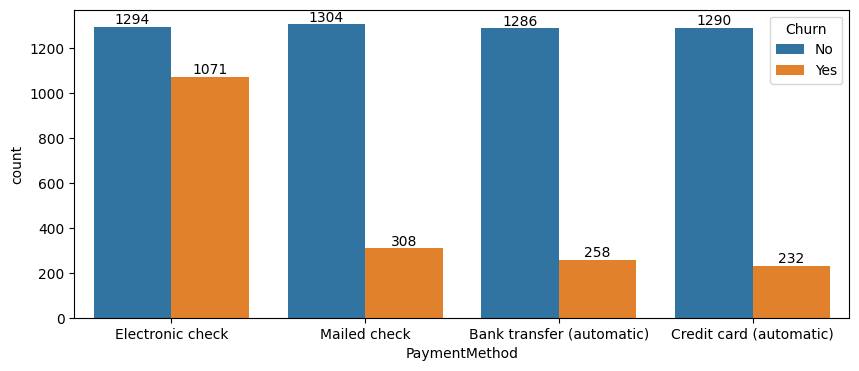

In [109]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=dataset,x='PaymentMethod',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# plt.xticks(rotation=45)
plt.show()

# customer is likely to churn when he is using electronic check payment method

In [63]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Contract
Two year          6283253.7
Month-to-month    5305861.5
One year          4467053.5
Name: TotalCharges, dtype: float64


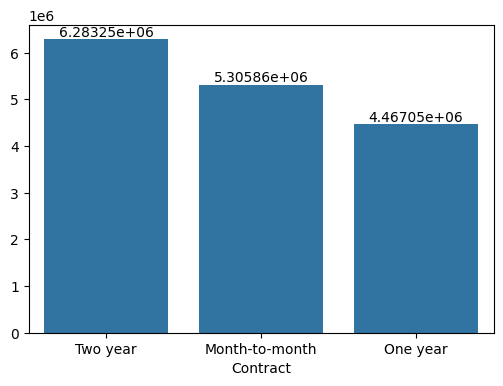

In [110]:
gp = dataset.groupby('Contract')['TotalCharges'].sum().sort_values(ascending=False)
print(gp)
df=pd.DataFrame(gp)
plt.figure(figsize=(6,4))
ax=sns.barplot(data=df,x=gp.index,y=gp.values)
ax.bar_label(ax.containers[0])
plt.show()